## Imports

In [1]:
import cv2
import numpy as np
from numpy import save
import math as m
import matplotlib.pyplot as plt
import os
from scipy.io import savemat
import scipy.io
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from numpy import moveaxis
from numpy import asarray
import torch
from scipy.stats import multivariate_normal
import torchvision
from torch.linalg import multi_dot
from HyperParameters import *
from Functions import *


## Read data

In [2]:
imgRef = torchvision.io.read_image(PathImg1)
imgTar = torchvision.io.read_image(PathImg2)

refKey = torch.tensor(np.load(PathNPY1), device=DEVICE)
tarKey = torch.tensor(np.load(PathNPY2), device=DEVICE)

height, width = imgRef.shape[1], imgRef.shape[2]

## PlayGround

tensor(255, dtype=torch.uint8)


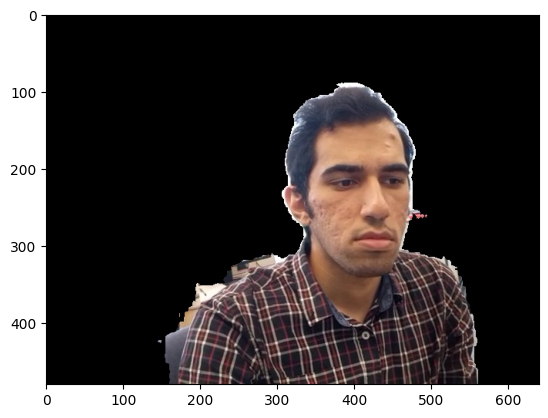

In [3]:
output = RenderImage(height, width, refKey, tarKey, imgTar)
showImageTensor(imgTar, is3chan=True)
# showImageTensor(output, isOutput=True)

tensor(255, dtype=torch.uint8)


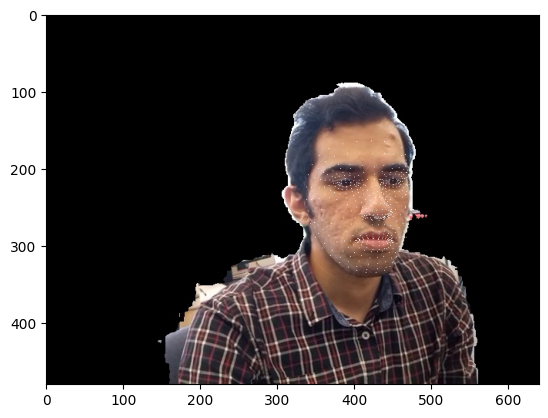

In [5]:
mm = createMask(tarKey, height, width, imgTar)
showImageTensor(mm, is3chan=True)

In [6]:
mm

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]], device='cuda:0', dtype=torch.uint8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.]]], device='cuda:0')
tensor(255.0000)
tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.]]], device='cuda:0')
tensor(255.0000)
tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.]]], device='cuda:0')
tensor(255.0000)
tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.]]], device='cuda:0')
tensor(255.0000)
tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.]]], device='cuda:0')
tensor(255.0000)
tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.]]], device='cuda:0')
tensor(255.0000)
tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.]]], device='cuda:0')
tensor(255.0000)
tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(255.0000)
tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.]]], device='cuda:0')
tensor(255.0000)
tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0.,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(255.0000, device='cuda:0')
tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.],
         [2., 2., 2.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.],
         [5., 5., 5.,  ..., 0., 0., 0.]]], device='cuda:0')
tensor(255.0000)


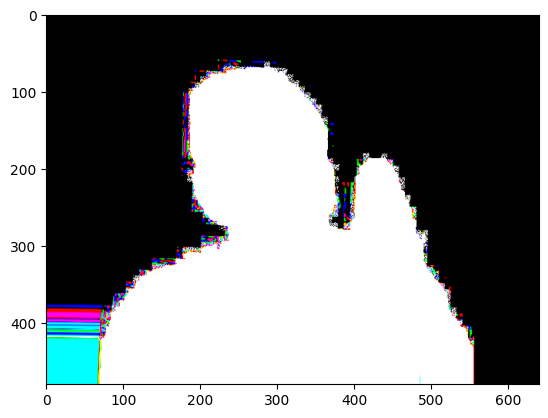

In [8]:
frameSize = (640, 480)

out = cv2.VideoWriter('idk.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 10, frameSize)

i = 50
j = 50
k = 50
T = -torch.mean(tarKey, axis=0) + torch.tensor([0.5, 0.5, 0], device=DEVICE)
for j in range(50, 70):
  euler = torch.tensor([(i-50) * pi/200, (j-50) * pi/200, (k-50) * pi/200], device=DEVICE)
  newKeys = TransformKeys(tarKey, euler, T)
 
  output = RenderImage(height, width, refKey, newKeys, imgRef)
  print(torch.max(output))
  
  dummy = torch.squeeze(output)
  dummy = createMask(newKeys, height, width, dummy)
  print(dummy)
  img = showImageTensor(dummy, is3chan=True, isOutput=True, returnOutput=True)
  
  img = np.moveaxis(np.uint8(img), 0, -1)
  
  out.write(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# for j in range(100):
#   euler = torch.tensor([(i-50) * pi/200, (j-50) * pi/200, (k-50) * pi/200], device=DEVICE)
#   # T = torch.tensor([0, 0, 0], device=DEVICE)
#   newKeys = TransformKeys(tarKey, euler, T)
#   output = RenderImage(height, width, refKey, newKeys, imgRef)
#   dummy = torch.squeeze(output)
#   dummy[:, (height*tarKey[:, 1]).long(), (width*tarKey[:, 0]).long()] = 1
#   img = showImageTensor(dummy, is3chan=True, returnOutput=True) * 255
#   # img = showImageTensor(output, isOutput=True, returnOutput=True) * 255
  
#   fuck = np.moveaxis(np.uint8(img), 0, -1)
  
#   out.write(cv2.cvtColor(fuck, cv2.COLOR_BGR2RGB))

# for k in range(100):
#   euler = torch.tensor([(i-50) * pi/200, (j-50) * pi/200, (k-50) * pi/200], device=DEVICE)
#   # T = torch.tensor([0, 0, 0], device=DEVICE)
#   newKeys = TransformKeys(tarKey, euler, T)
#   output = RenderImage(height, width, refKey, newKeys, imgRef)
#   dummy = torch.squeeze(output)
#   dummy[:, (height*tarKey[:, 1]).long(), (width*tarKey[:, 0]).long()] = 1
#   img = showImageTensor(dummy, is3chan=True, returnOutput=True) * 255
#   # img = showImageTensor(output, isOutput=True, returnOutput=True) * 255
  
#   fuck = np.moveaxis(np.uint8(img), 0, -1)
  
#   out.write(cv2.cvtColor(fuck, cv2.COLOR_BGR2RGB))

out.release()

In [19]:
img.shape

(480, 640, 3)

In [ ]:
frameSize = (640, 480)

out = cv2.VideoWriter('keypoints.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 10, frameSize)

i = 0
j = 0
k = 0
T = -torch.mean(tarKey, axis=0) + torch.tensor([0.5, 0.5, 0], device=DEVICE)
for i in range(100):
  euler = torch.tensor([(i-50) * pi/200, (j-50) * pi/200, (k-50) * pi/200], device=DEVICE)
  newKeys = TransformKeys(tarKey, euler, T)

  output = createMask(newKeys, height, width) * 255


  img = showImageTensor(output, is3chan=False, isOutput=False, returnOutput=True)
  img = img.repeat(3,1,1)
  out.write(np.moveaxis(np.uint8(img), 0, -1))

for j in range(100):
  euler = torch.tensor([(i-50) * pi/200, (j-50) * pi/200, (k-50) * pi/200], device=DEVICE)
  newKeys = TransformKeys(tarKey, euler, T)

  output = createMask(newKeys, height, width) * 255


  img = showImageTensor(output, is3chan=False, isOutput=False, returnOutput=True)
  img = img.repeat(3,1,1)
  out.write(np.moveaxis(np.uint8(img), 0, -1))


for k in range(100):
  euler = torch.tensor([(i-50) * pi/200, (j-50) * pi/200, (k-50) * pi/200], device=DEVICE)
  newKeys = TransformKeys(tarKey, euler, T)

  output = createMask(newKeys, height, width) * 255


  img = showImageTensor(output, is3chan=False, isOutput=False, returnOutput=True)
  img = img.repeat(3,1,1)
  out.write(np.moveaxis(np.uint8(img), 0, -1))

out.release()